In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
IRS_data=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第9章/利率互换交易规模.xlsx',
                       sheet_name="Sheet1",header=0,index_col=0)

In [3]:
IRS_data

,名义本金（亿元）
参考利率,
FR007,17848.80
Shibor3M,3434.38
LPR1Y,349.50
其他参考利率,318.50


In [4]:
name=IRS_data.index  #获取数据框关于参考利率类型的利率名称
volume=(np.array(IRS_data)).ravel() #将数据框涉及名义本金的数值转为一维数组

In [5]:
name

Index(['FR007', 'Shibor3M', 'LPR1Y', '其他参考利率 '], dtype='object', name='参考利率')

In [6]:
volume

array([17848.8 ,  3434.38,   349.5 ,   318.5 ])

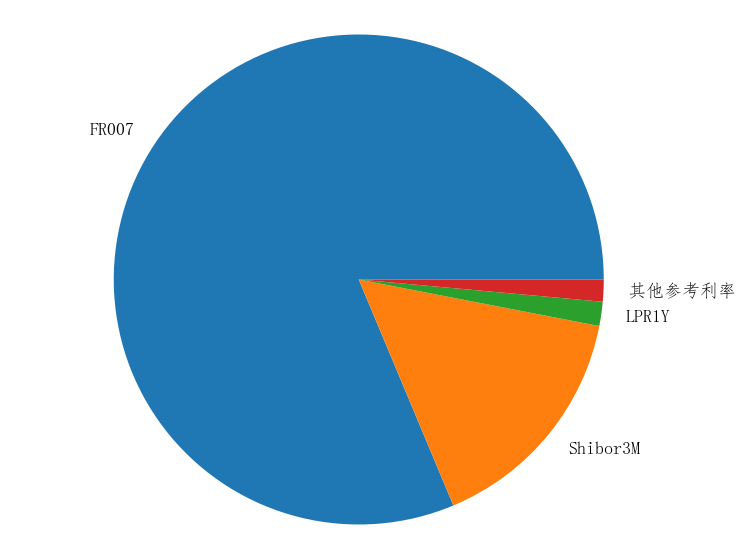

In [7]:
plt.figure(figsize=(9,7))
plt.pie(x=volume,labels=name,textprops={'fontsize':13})
plt.axis('equal') #使饼图是一个圆形
plt.show()

In [8]:
currency=['美元与人民币','非美元外币与人民币'] #不同交换币种名称
volume1=[158.45,10.67] #对应不同交换币种的人民币外汇货币掉期或成交金额（亿元）

In [9]:
tenor=['不超过1年','超过1年'] #不同期限名称
volume2=[141.29,27.83]  #对应不同期限的人民币外汇货币掉期成家金额（亿元）

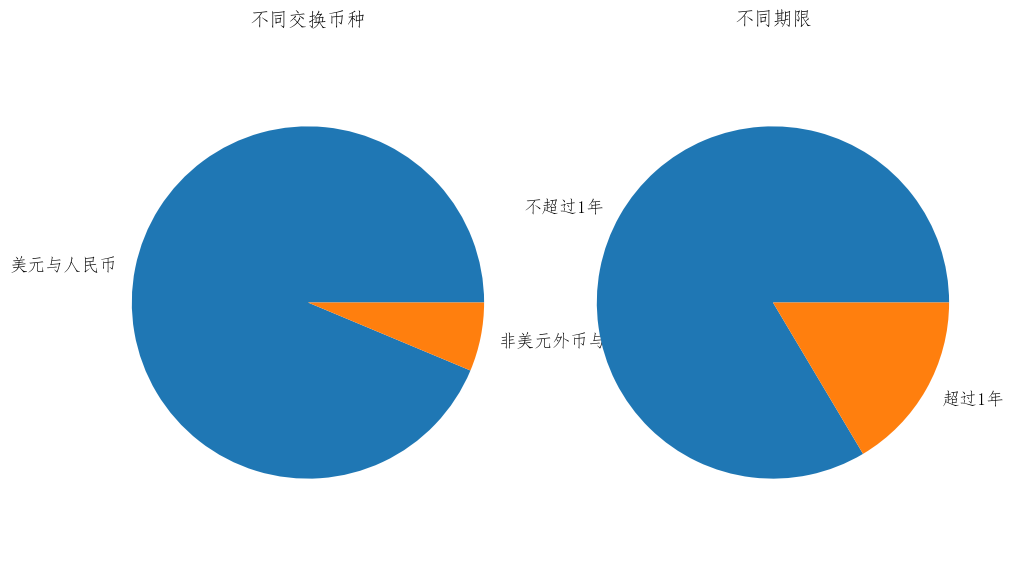

In [10]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.pie(x=volume1,labels=currency,textprops={'fontsize':13})
plt.axis('equal') #使饼图是一个圆形
plt.title(u'不同交换币种',fontsize=14)
plt.subplot(1,2,2)
plt.pie(x=volume2,labels=tenor,textprops={'fontsize':13})
plt.axis('equal')
plt.title(u'不同期限',fontsize=14)
plt.show()

In [11]:
CRM_data=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第9章/未到期信用风险缓释工具合约面值（2020年末）.xlsx',
                       sheet_name="Sheet1",header=0,index_col=0)

In [12]:
type_CRM=CRM_data.index
par_CRM=(np.array(CRM_data)).ravel()

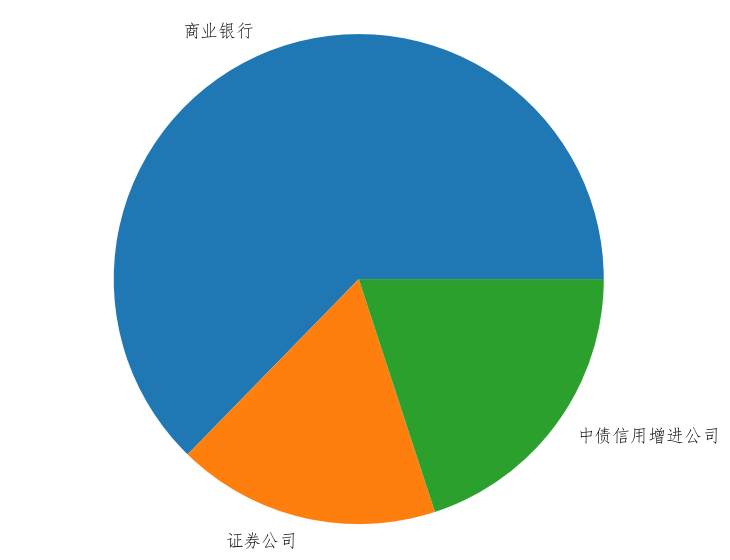

In [13]:
plt.figure(figsize=(9,7))
plt.pie(x=par_CRM,labels=type_CRM,textprops={'fontsize':13})
plt.axis('equal')
plt.show()

利率互换

In [14]:
def IRS_cashflow(R_flt,R_fix,L,m,position):
    '''定义一个计算利率互换合约存续期内每期支付利息净额的函数
    R_flt:代表利率互换的每期浮动利率，以数组格式输入
    R_fix:代表利率互换的固定利率
    L:代表利率互换的本金
    m:代表利率互换存续期内每年交换利息的频次
    position:代表头寸方向，输入position='long'代表多头（支付固定利息，收取浮动利息），输入其他则代表空头'''
    if position=='long':
        cashflow=(R_flt-R_fix)*L/m
    else:
        cashflow=(R_fix-R_flt)*L/m
    return cashflow

In [15]:
rate_float=np.array([0.031970,0.032000,0.029823,0.030771,0.044510,0.047093,0.043040,0.032750,0.029630,0.015660]) #以数组格式输入Shibor

In [16]:
rate_fixed=0.037
par=1e8
M=2

In [17]:
Netpay_A=IRS_cashflow(R_flt=rate_float,R_fix=rate_fixed,L=par,m=M,position='long') #A银行（多头）的每期利息支付净额
Netpay_A

array([ -251500.,  -250000.,  -358850.,  -311450.,   375500.,   504650.,
         302000.,  -212500.,  -368500., -1067000.])

In [18]:
Netpay_B=IRS_cashflow(R_flt=rate_float,R_fix=rate_fixed,L=par,m=M,position='short') #B银行（空头）的每期利息支付净额
Netpay_B

array([ 251500.,  250000.,  358850.,  311450., -375500., -504650.,
       -302000.,  212500.,  368500., 1067000.])

In [19]:
Totalpay_A=np.sum(Netpay_A)
Totalpay_B=np.sum(Netpay_B)
print('利率互换合约存续期内A银行利息支付净额的合计数',round(Totalpay_A,2))
print('利率互换合约存续期内b银行利息支付净额的合计数',round(Totalpay_B,2))

利率互换合约存续期内A银行利息支付净额的合计数 -1637650.0
利率互换合约存续期内b银行利息支付净额的合计数 1637650.0


In [20]:
def swap_rate(m,y,T):
    '''定义一个计算互换利率的函数
    m:代表利率互换合约存续期内每年交换利息的频次
    y:代表合约初始日对应于每期利息交换期限、连续复利的零息利率（贴现利率），用数组格式输入
    T:代表利率互换的期限（年）'''
    n_list=np.arange(1,m*T+1)  #创建1—mT的整数数组
    t=n_list/m #计算合约初始日距离每期利息交换日的期限数组
    q=np.exp(-y*t) #计算针对不同期限的贴现因子（数组格式）
    rate=m*(1-q[-1])/np.sum(q) #计算互换利率
    return rate


In [21]:
freq=2 #利率互换合约每年交换利息的频次
tenor=3 #利率互换合约的期限

In [22]:
r_list=np.array([0.020579,0.021276,0.022080,0.022853,0.023527,0.024036]) #输入对应于不同利息交换期限的零息利率

In [23]:
R_July1=swap_rate(m=freq,y=r_list,T=tenor) #计算互换利率

In [24]:
print('2020年7月1日利率互换合约的互换利率',round(R_July1,4))

2020年7月1日利率互换合约的互换利率 0.0241


In [25]:
#利率互换的定价
def swap_value(R_fix,R_flt,t,y,m,L,position):
    '''定义一个计算合约存续期内利率互换合约价值的函数
    R_fix:代表利率互换合约的固定利率（互换利率）
    R_flt:代表距离合约定价日最近的下一期利率交换的浮动利率
    t:代表合约定价日距离每期利息交换日的期限（年），用数组格式输入
    y:代表期限为t并且连续复利的零息利率（贴现利率），用数组格式输入
    m:代表利率互换合约每年交换利息的频次
    L:代表利率互换合约的本金
    position:代表头寸方向，输入position='long'代表多头（支付固定利息，收取浮动利息）'''
    from numpy import exp
    B_fix=(R_fix*sum(exp(-y*t))/m+exp(-y[-1]*t[-1]))*L #计算固定利率债券价值
    B_flt=(R_flt/m+1)*L*exp(-y[0]*t[0]) #计算浮动利率债券价值
    if position=='long':
        value=B_flt-B_fix  #计算互换利率合约多头的价值
    else:
        value=B_fix-B_flt
    return value

In [26]:
import scipy.interpolate as si

In [27]:
T=np.array([1/12,2/12,0.25,0.5,0.75,1.0,2.0,3.0])

In [28]:
R_July10=np.array([0.017219,0.017526,0.021012,0.021100,0.021764,0.022165,0.025040,0.026894]) #2020年7月10日已知的零息利率

In [29]:
R_July20=np.array([0.016730,0.018373,0.019934,0.020439,0.021621,0.022540,0.024251,0.025256]) #2020年7月20日已知的零息利率

In [30]:
func_July10=si.interp1d(x=T,y=R_July10,kind="cubic") #运用2020年7月10日的零息利率数据和3阶样条曲线插值法构建插值函数

In [31]:
func_July20=si.interp1d(x=T,y=R_July20,kind="cubic")

In [32]:
T_new=np.array([1/12,2/12,0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0])  #输入包含1.5年和2.5年的新期限数组

In [33]:
R_new_July10=func_July10(T_new) #用插值法计算2020年7月10日的新零息利率
R_new_July10

array([0.017219  , 0.017526  , 0.021012  , 0.0211    , 0.021764  ,
       0.022165  , 0.0231695 , 0.02504   , 0.02665525, 0.026894  ])

In [34]:
R_new_July20=func_July20(T_new) #运用插值法计算2020年7月20日的新零息利率
R_new_July20

array([0.01673   , 0.018373  , 0.019934  , 0.020439  , 0.021621  ,
       0.02254   , 0.02357906, 0.024251  , 0.02474644, 0.025256  ])

In [35]:
import datetime as dt

In [36]:
T1=dt.datetime(2020,7,10) #输入2020年7月10日
T2=dt.datetime(2020,7,20)
T3=dt.datetime(2021,1,1) #输入下一期利息交换日

In [37]:
tenor1=(T3-T1).days/365 #计算2020年7月10日至2021年1月1日的期限（年）
tenor2=(T3-T2).days/365

In [38]:
T=3 #利率互换的总期限
M=2 #每年交换利息的频次

In [39]:
T_list1=np.arange(T*M)/M #创建存放2020年7月10日距离每期利息交换日期限的初始数组
T_list1

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [40]:
T_list1=T_list1+tenor1 #计算相关期限

In [41]:
T_list1

array([0.47945205, 0.97945205, 1.47945205, 1.97945205, 2.47945205,
       2.97945205])

In [42]:
T_list2=np.arange(T*M)/M
T_list2=T_list2+tenor2
T_list2

array([0.45205479, 0.95205479, 1.45205479, 1.95205479, 2.45205479,
       2.95205479])

In [43]:
yield_July10=np.zeros_like(T_list1) #创建存放2020年7月10日对应每期利息交换期限的零息利率初始数组

In [44]:
R_new_July10

array([0.017219  , 0.017526  , 0.021012  , 0.0211    , 0.021764  ,
       0.022165  , 0.0231695 , 0.02504   , 0.02665525, 0.026894  ])

In [45]:
yield_July10[0]=R_new_July10[3] #存放2020年7月10日6个月期零息利率
yield_July10[1:]=R_new_July10[5:] #存放2020年7月10日1年期、1.5年期、2年期、2.5年期和3年期零息利率

In [46]:
yield_July20=np.zeros_like(T_list2)  #创建存放2020年7月20日对应每期利息交互期限的零息利率初始数组

In [47]:
yield_July20[0]=R_new_July20[3]
yield_July20[1:]=R_new_July20[5:]

In [48]:
rate_fix=0.0241 #互换利率（固定利率）
rate_float=0.02178 #第1期利息交换的浮动利率
par=1e8

In [49]:
value_July10_long=swap_value(R_fix=rate_fix,R_flt=rate_float,t=T_list1,y=yield_July10,m=M,L=par,position='long') #2020年7月10日对于C银行的利率互换合约价值
value_July10_short=swap_value(R_fix=rate_fix,R_flt=rate_float,t=T_list1,y=yield_July10,m=M,L=par,position='short') #2020年7月10日对于D银行的利率互换合约价值

In [50]:
print('2020年7月10日C银行（多头）的利率互换合约价值',round(value_July10_long,2))
print('2020年7月10日D银行（空头）的利率互换合约价值',round(value_July10_short,2))

2020年7月10日C银行（多头）的利率互换合约价值 848538.61
2020年7月10日D银行（空头）的利率互换合约价值 -848538.61


In [51]:
value_July20_long=swap_value(R_fix=rate_fix,R_flt=rate_float,t=T_list2,y=yield_July20,m=M,L=par,position='long') #2020年7月20日对于C银行的利率互换合约价值
value_July20_short=swap_value(R_fix=rate_fix,R_flt=rate_float,t=T_list2,y=yield_July20,m=M,L=par,position='short') #2020年7月20日对于D银行的利率互换合约价值

In [52]:
print('2020年7月20日C银行（多头）的利率互换合约价值',round(value_July20_long,2))
print('2020年7月20日D银行（空头）的利率互换合约价值',round(value_July20_short,2))

2020年7月20日C银行（多头）的利率互换合约价值 404294.41
2020年7月20日D银行（空头）的利率互换合约价值 -404294.41


In [53]:
def CCS_fixed_cashflow(La,Lb,Ra_fix,Rb_fix,m,T,trader,par):
    '''定义一个计算双固定利率货币互换在存续期间每期现金流的函数
    合约的交易双方分配用A交易方和B交易方表示
    La:代表在合约初始日A交易方支付的一种货币本金（合约到期日A交易方收回的货币本金）
    Lb:代表在合约初始日B交易方支付的另一种货币本金（合约到期日B交易方收回的货币本金）
    Ra_fix:代表基于本金La的固定利率
    Rb_fix:代表基于本金Lb的固定利率
    m:代表每年交换利息的频次
    T:代表货币互换合约的期限（年）
    trader:代表合约的交易方，输入trader='A'表示计算A交易方发生的期间现金流，输入其他则表示计算B交易方发生的期间现金流
    par:代表计算现金流所依据的本金，输入par='La'表示计算的现金流基于本金La,输入其他则表示计算的现金流基于本金Lb'''
    cashflow=np.zeros(m*T+1) #创建存放每期现金流的初始数组
    if par=='La':  #依据本金La计算现金流
        cashflow[0]=-La #计算A交易方第1期的现金流
        cashflow[1:-1]=Ra_fix*La/m #计算A交易方第2期至倒数第2期的现金流
        cashflow[-1]=(Ra_fix/m+1)*La  #计算A交易方最后一期的现金流
        if trader=='A':
            return cashflow
        else:
            return -cashflow
    else: #依据本金Lb计算现金流
        cashflow[0]=Lb #计算A交易方第1期的现金流
        cashflow[1:-1]=-Rb_fix*Lb/m #计算A交易方第2期至倒数第2期的现金流
        cashflow[-1]=-(Rb_fix/m+1)*Lb #计算A交易方最后一期的现金流
        if trader=='A':
            return cashflow
        else:
            return -cashflow

In [54]:
par_RMB=6.4e8
par_USD=1e8

In [55]:
rate_RMB=0.02
rate_USD=0.01

In [56]:
M=2 #货币互换合约每年交换利息的频次
tenor=5 #货币互换合约的期限（年）

In [57]:
cashflow_Ebank_RMB=CCS_fixed_cashflow(La=par_RMB,Lb=par_USD,Ra_fix=rate_RMB,Rb_fix=rate_USD,m=M,T=tenor,trader='A',par='La')
#计算E银行基于人民币本金的每期现金流

In [58]:
cashflow_Ebank_USD=CCS_fixed_cashflow(La=par_RMB,Lb=par_USD,Ra_fix=rate_RMB,Rb_fix=rate_USD,m=M,T=tenor,trader='A',par='Lb') 
#计算E银行基于美元本金的每期现金流

In [59]:
print('E银行基于人民币本金的每期现金流（人民币）\n',cashflow_Ebank_RMB)
print('E银行基于美元本金的每期现金流（美元）\n',cashflow_Ebank_USD)

E银行基于人民币本金的每期现金流（人民币）
 [-6.400e+08  6.400e+06  6.400e+06  6.400e+06  6.400e+06  6.400e+06
  6.400e+06  6.400e+06  6.400e+06  6.400e+06  6.464e+08]
E银行基于美元本金的每期现金流（美元）
 [ 1.000e+08 -5.000e+05 -5.000e+05 -5.000e+05 -5.000e+05 -5.000e+05
 -5.000e+05 -5.000e+05 -5.000e+05 -5.000e+05 -1.005e+08]


In [60]:
cashflow_Fbank_RMB=CCS_fixed_cashflow(La=par_RMB,Lb=par_USD,Ra_fix=rate_RMB,Rb_fix=rate_USD,m=M,T=tenor,trader='B',par='La')
#计算F银行基于人民币本金的每期现金流

In [61]:
cashflow_Fbank_USD=CCS_fixed_cashflow(La=par_RMB,Lb=par_USD,Ra_fix=rate_RMB,Rb_fix=rate_USD,m=M,T=tenor,trader='B',par='Lb')
#计算F银行基于美元本金的每期现金流

In [62]:
print('F银行基于人民币本金的每期现金流（人民币）\n',cashflow_Fbank_RMB)
print('F银行基于美元本金的每期现金流（美元）\n',cashflow_Fbank_USD)

F银行基于人民币本金的每期现金流（人民币）
 [ 6.400e+08 -6.400e+06 -6.400e+06 -6.400e+06 -6.400e+06 -6.400e+06
 -6.400e+06 -6.400e+06 -6.400e+06 -6.400e+06 -6.464e+08]
F银行基于美元本金的每期现金流（美元）
 [-1.000e+08  5.000e+05  5.000e+05  5.000e+05  5.000e+05  5.000e+05
  5.000e+05  5.000e+05  5.000e+05  5.000e+05  1.005e+08]


In [63]:
def CCS_fixflt_cashflow(La,Lb,Ra_fix,Rb_flt,m,T,trader,par):
    '''定义一个计算固定对浮动货币互换在存续期间每期现金流的函数
    合约的交易双方依然分别用A交易方和B交易方表示'''
    cashflow=np.zeros(m*T+1) #创建存放每期现金流的初始数组
    if par=='La':
        cashflow[0]=-La #A交易方第1期交换的现金流
        cashflow[1:-1]=Ra_fix*La/m #A交易方第2期至倒数第2期的现金流
        cashflow[-1]=(Ra_fix/m+1)*La #A交易方最后一期的现金流
        if trader=='A':
            return cashflow
        else:
            return -cashflow
    else:
        cashflow[0]=Lb
        cashflow[1:-1]=-Rb_flt[:-1]*Lb/m #A交易方第2期至倒数第2期的现金流
        cashflow[-1]=-(Rb_flt[-1]/m+1)*Lb #A交易方最后一期的现金流
        if trader=='A':
            return cashflow
        else:
            return -cashflow

In [64]:
def CCS_float_cashflow(La,Lb,Ra_flt,Rb_flt,m,T,trader,par):
    '''定义一个计算双浮动利率货币互换在存续期间每期现金流的函数
    合约的交易双方分别用A交易方和B交易方表示'''
    cashflow=np.zeros(m*T+1) 
    if par=='La':
        cashflow[0]=-La
        cashflow[1:-1]=Ra_flt[:-1]*La/m
        cashflow[-1]=(Ra_flt[-1]/m+1)*La
        if trader=='A':
            return cashflow
        else:
            return -cashflow
    else:
        cashflow[0]=Lb
        cashflow[1:-1]=-Rb_flt[:-1]*Lb/m
        cashflow[-1]=-(Rb_flt[-1]/m+1)*Lb
        if trader=='A':
            return cashflow
        else:
            return -cashflow

In [65]:
par_RMB1=6.9e8
par_USD=1e8
par_RMB2=1.8e8
par_HKD=2e8

In [66]:
M1=2
M2=1 #第2份货币互换合约每年交换利息的频次

In [67]:
T1=3
T2=4

In [68]:
rate_fix=0.03
Libor=np.array([0.012910,0.014224,0.016743,0.024744,0.028946,0.025166]) #第1份货币互换合约基于美元本金的浮动利率
Shibor=np.array([0.031600,0.046329,0.035270,0.031220]) #第2份货币互换合约基于人民币本金的浮动利率
Hibor=np.array([0.013295,0.015057,0.026593,0.023743]) #第2分货币互换合约基于港元本金的浮动利率

In [69]:
cashflow_Gbank_RMB1=CCS_fixflt_cashflow(La=par_RMB1,Lb=par_USD,Ra_fix=rate_fix,Rb_flt=Libor,m=M1,T=T1,trader='A',par='La')
#第1份货币互换合约在存续期内G银行的人民币现金流
cashflow_Gbank_USD=CCS_fixflt_cashflow(La=par_RMB1,Lb=par_USD,Ra_fix=rate_fix,Rb_flt=Libor,m=M1,T=T1,trader='A',par='Lb')
#第1份货币互换合约在存续期内G银行的美元现金流

In [70]:
print('第1份货币互换合约在存续期内G银行的人民币现金流\n',cashflow_Gbank_RMB1)
print('第1份货币互换合约在存续期内G银行的美元现金流\n',cashflow_Gbank_USD)

第1份货币互换合约在存续期内G银行的人民币现金流
 [-6.9000e+08  1.0350e+07  1.0350e+07  1.0350e+07  1.0350e+07  1.0350e+07
  7.0035e+08]
第1份货币互换合约在存续期内G银行的美元现金流
 [ 1.000000e+08 -6.455000e+05 -7.112000e+05 -8.371500e+05 -1.237200e+06
 -1.447300e+06 -1.012583e+08]


In [71]:
cashflow_Hbank_RMB=CCS_fixflt_cashflow(La=par_RMB1,Lb=par_USD,Ra_fix=rate_fix,Rb_flt=Libor,m=M1,T=T1,trader='B',par='La')
#第1份货币互换合约在存续期内H银行的人民币现金流
cashflow_Hbank_USD=CCS_fixflt_cashflow(La=par_RMB1,Lb=par_USD,Ra_fix=rate_fix,Rb_flt=Libor,m=M1,T=T1,trader='B',par='Lb')
#第1份货币互换合约在存续期内H银行的美元现金流

In [72]:
print('第1份货币互换合约在存续期内H银行的人民币现金流\n',cashflow_Hbank_RMB)
print('第1份货币互换合约在存续期内H银行的美元现金流\n',cashflow_Hbank_USD)

第1份货币互换合约在存续期内H银行的人民币现金流
 [ 6.9000e+08 -1.0350e+07 -1.0350e+07 -1.0350e+07 -1.0350e+07 -1.0350e+07
 -7.0035e+08]
第1份货币互换合约在存续期内H银行的美元现金流
 [-1.000000e+08  6.455000e+05  7.112000e+05  8.371500e+05  1.237200e+06
  1.447300e+06  1.012583e+08]


In [73]:
cashflow_Gbank_RMB2=CCS_float_cashflow(La=par_RMB2,Lb=par_HKD,Ra_flt=Shibor,Rb_flt=Hibor,m=M2,T=T2,trader='A',par='La')
#第2份货币互换合约在存续期内G银行的人民币现金流
cashflow_Gbank_HKD=CCS_float_cashflow(La=par_RMB2,Lb=par_HKD,Ra_flt=Shibor,Rb_flt=Hibor,m=M2,T=T2,trader='A',par='Lb')
#第2份货币互换合约在存续期内G银行的港元现金流

In [74]:
print('第2份货币互换合约在存续期内G银行的人民币现金流\n',cashflow_Gbank_RMB2)
print('第2份货币互换合约在存续期内G银行的港元现金流\n',cashflow_Gbank_HKD)

第2份货币互换合约在存续期内G银行的人民币现金流
 [-1.800000e+08  5.688000e+06  8.339220e+06  6.348600e+06  1.856196e+08]
第2份货币互换合约在存续期内G银行的港元现金流
 [ 2.000000e+08 -2.659000e+06 -3.011400e+06 -5.318600e+06 -2.047486e+08]


In [75]:
cashflow_Ibank_RMB=CCS_float_cashflow(La=par_RMB2,Lb=par_HKD,Ra_flt=Shibor,Rb_flt=Hibor,m=M2,T=T2,trader='B',par='La')
cashflow_Ibank_HKD=CCS_float_cashflow(La=par_RMB2,Lb=par_HKD,Ra_flt=Shibor,Rb_flt=Hibor,m=M2,T=T2,trader='B',par='Lb')

In [76]:
print('第2份货币互换合约在存续期内I银行的人民币现金流\n',cashflow_Ibank_RMB)
print('第2份货币互换合约在存续期内I银行的港元现金流\n',cashflow_Ibank_HKD)

第2份货币互换合约在存续期内I银行的人民币现金流
 [ 1.800000e+08 -5.688000e+06 -8.339220e+06 -6.348600e+06 -1.856196e+08]
第2份货币互换合约在存续期内I银行的港元现金流
 [-2.000000e+08  2.659000e+06  3.011400e+06  5.318600e+06  2.047486e+08]


In [77]:
def CCS_value(types,La,Lb,Ra,Rb,ya,yb,E,m,t,trader):
    '''定义一个计算在合约存续期内货币互换合约价值的函数，交易双方是A交易方和B交易方，
    同时约定A交易方在合约初始日支付A货币本金，B交易方在合约初始日支付B货币本金
    types:代表货币互换类型：‘双固定利率货币互换’、‘双浮动利率货币互换’、‘输入其他则表示计算固定对浮动货币互换’
    La:代表A货币本金
    Lb:代表B货币本金
    Ra:代表针对A货币本金的利率
    Rb:代表针对B货币本金的利率
    ya:代表在合约定价日针对A货币本金并对应不同期限、连续复利的零息利率，用数组格式输入
    yb:代表在合约定价日针对B货币本金并对应不同期限、连续复利的零息利率，用数组格式输入
    E:代表在合约定价日的即期汇率，标价方式是1单位B货币对应A货币数量
    m:代表每年交换利息的频次
    t:代表合约定价日距离剩余每期利息交换日的期限长度，用数组格式输入
    trader:代表交易方，输入trader=‘A’表示A交易方，输入其他则表示B交易方'''
    from numpy import exp
    if types=='双固定利率货币互换':
        Bond_A=(Ra*sum(exp(-ya*t))/m+exp(-ya[-1]*t[-1]))*La #计算对应A货币本金的固定利率债券价值
        Bond_B=(Rb*sum(exp(-yb*t))/m+exp(-yb[-1]*t[-1]))*Lb #计算对应B货币本金的固定利率债券价值
        if trader=='A':  #针对A交易方
            swap_value=Bond_A-Bond_B*E
        else: #针对B交易方
            swap_value=Bond_B-Bond_A/E
    elif types=='双浮动利率货币互换':
        Bond_A=(Ra/m+1)*exp(-ya[0]*t[0])*La
        Bond_B=(Rb/m+1)*exp(-yb[0]*t[0])*Lb
        if trader=='A':
            swap_value=Bond_A-Bond_B*E
        else:
            swap_value=Bond_A-Bond_A/E
    else:  #当货币互换类型是固定对浮动货币互换时
        Bond_A=(Ra*sum(exp(-ya*t))/m+exp(-ya[-1]*t[-1]))*La
        Bond_B=(Rb/m+1)*exp(-yb[0]*t[0])*Lb
        if trader=='A':
            swap_value=Bond_A-Bond_B*E
        else:
            swap_value=Bond_B-Bond_A/E
    return swap_value

In [78]:
y_RMB_Apr1=np.array([0.016778,0.019062,0.019821]) #2020年4月1日人民币零息利率
M=1 #每年交换利息的频次
tenor=3 #合约的期限

In [79]:
rate_RMB=swap_rate(m=M,y=y_RMB_Apr1,T=tenor) #计算固定利率
print('货币互换合约针对人民币本金的固定利率',round(rate_RMB,4))

货币互换合约针对人民币本金的固定利率 0.02


In [80]:
FX_Apr1=7.0771 #2020年4月1日美元兑人民币汇率
par_USD=1e8
par_RMB=par_USD*FX_Apr1 #货币互换合约的人民币本金金额

In [81]:
Libor_Apr1=0.010024 #2020年4月1日12个月期美元libor

In [82]:
y_RMB_Jun18=np.array([0.021156,0.023294,0.023811])
y_USD_Jun18=np.array([0.0019,0.0019,0.0022])
FX_Jun18=7.0903

In [83]:
y_RMB_Jul20=np.array([0.022540,0.024251,0.025256])
y_USD_Jul20=np.array([0.0014,0.0016,0.0018])
FX_Jul20=6.9928

In [84]:
t0=dt.datetime(2020,4,1)
t1=dt.datetime(2020,6,18)
t2=dt.datetime(2020,7,20)

In [85]:
t1_list=np.arange(1,tenor+1)-(t1-t0).days/365
t1_list

array([0.78630137, 1.78630137, 2.78630137])

In [86]:
t2_list=np.arange(1,tenor+1)-(t2-t0).days/365
t2_list

array([0.69863014, 1.69863014, 2.69863014])

In [87]:
value_RMB_Jun18=CCS_value(types='固定对浮动货币互换',La=par_RMB,Lb=par_USD,Ra=rate_RMB,Rb=Libor_Apr1,
                          ya=y_RMB_Jun18,yb=y_USD_Jun18,E=FX_Jun18,m=M,t=t1_list,trader='A')

In [88]:
print('2020年6月18日J银行的货币互换合约价值（人民币）',round(value_RMB_Jun18,2))

2020年6月18日J银行的货币互换合约价值（人民币） -12068317.38


In [89]:
value_USD_Jun18=CCS_value(types='固定对浮动货币互换',La=par_RMB,Lb=par_USD,Ra=rate_RMB,Rb=Libor_Apr1,
                          ya=y_RMB_Jun18,yb=y_USD_Jun18,E=FX_Jun18,m=M,t=t1_list,trader='B')

In [90]:
value_RMB_Jul20=CCS_value(types='固定对浮动货币互换',La=par_RMB,Lb=par_USD,Ra=rate_RMB,Rb=Libor_Apr1,
                          ya=y_RMB_Jul20,yb=y_USD_Jul20,E=FX_Jul20,m=M,t=t2_list,trader='A')

In [91]:
value_USD_Jul20=CCS_value(types='固定对浮动货币互换',La=par_RMB,Lb=par_USD,Ra=rate_RMB,Rb=Libor_Apr1,
                          ya=y_RMB_Jul20,yb=y_USD_Jul20,E=FX_Jul20,m=M,t=t2_list,trader='B')

In [92]:
print('2020年6月18日K银行的货币互换合约价值（美元）',round(value_USD_Jun18,2))
print('2020年7月20日J银行的货币互换合约价值（人民币）',round(value_RMB_Jul20,2))
print('2020年7月20日K银行的货币互换合约价值（美元）',round(value_USD_Jul20,2))

2020年6月18日K银行的货币互换合约价值（美元） 1702088.4
2020年7月20日J银行的货币互换合约价值（人民币） -3804108.71
2020年7月20日K银行的货币互换合约价值（美元） 544003.65


In [95]:
def CDS_cashflow(S,m,T1,T2,L,recovery,trader,event):
    '''定义一个计算信用违约互换期间现金流的函数
    S:代表信用违约互换价差（信用保护费用）
    m:代表信用违约互换价差每年支付的频次，并且不超过2次
    T1:代表合约期限（年）
    T2:代表合约初始日距离信用事件发生日的期限长度（年），信用事件未发生则输入T2='Na'
    L:代表合约的本金
    recovery:代表信用事件发生时的回收率，信用事件未发生则输入recovery='Na'
    trader:代表交易方，输入trader='buyer'表示买方，输入其他则表示卖方
    event:代表信用事件，输入event='N'表示合约存续期内信用事件未发生，输入其他则表示合约存续期内信用事件发生'''
    #第1步：合约存续期内未发生信用事件时计算现金流
    if event=='N': #当合约存续期内信用事件未发生
        n=m*T1 #计算期间现金流支付的次数
        cashflow=S*L*np.ones(n)/m #合约期间支付信用保护费金额的现金流
        if trader=='buyer':
            CF=-cashflow
        else:
            CF=cashflow
    #第2步：合约存续期内发生信用事件并且信用保护费用每年支付1次时计算现金流
    else:
        default_pay=(1-recovery)*L
        if m==1: #信用违约互换价差每年支付的频次等于1
            n=int(T2)*m+1
            cashflow=S*L*np.ones(n)/m #计算合约期间的现金流（最后一个元素后面需要调整）
            spread_end=(T2-int(T2))*S*L  #合约最后一期（信用事件发生日）支付的信用保护费
            cashflow[-1]=spread_end-default_pay
            if trader=='buyer':
                CF=-cashflow
            else:
                CF=cashflow
    #第3步：合约存续期内发生信用事件并且信用保护费用每年支付2次时计算现金流
        else:
            if T2-int(T2)<0.5: #信用事件发生在前半年
                n=int(T2)*m+1
                cashflow=S*L*np.ones(n)/m
                spread_end=(T2-int(T2))*S*L
                cashflow[-1]=spread_end-default_pay
                if trader=='buyer':
                    CF=-cashflow
                else:
                    CF=cashflow
            else: #信用事件发生在后半年
                n=(int(T2)+1)*m
                cashflow=S*L*np.ones(n)/m
                spread_end=(T2-int(T2)-0.5)*S*L
                cashflow[-1]=spread_end-default_pay
                if trader=='buyer':
                    CF=-cashflow
                else:
                    CF=cashflow
    return CF
                

In [96]:
spread=0.012
M=1
tenor=3
par=1e8

In [97]:
cashflow_buyer1=CDS_cashflow(S=spread,m=M,T1=tenor,T2='Na',L=par,recovery='Na',trader='buyer',event='N') #计算合约期间买方的现金流
cashflow_seller1=CDS_cashflow(S=spread,m=M,T1=tenor,T2='Na',L=par,recovery='Na',trader='seller',event='N') #计算合约期间买方的现金流
print('未发生信用事件情形下合约期间买方的现金流',cashflow_buyer1)
print('未发生信用事件情形下合约期间卖方的现金流',cashflow_seller1)

未发生信用事件情形下合约期间买方的现金流 [-1200000. -1200000. -1200000.]
未发生信用事件情形下合约期间卖方的现金流 [1200000. 1200000. 1200000.]


In [98]:
T_default=28/12 #合约初始日距离信用事件发生日的期限长度（年）
rate=0.35
cashflow_buyer2=CDS_cashflow(S=spread,m=M,T1=tenor,T2=T_default,L=par,recovery=rate,trader='buyer',event='Y') #计算合约期间买方的现金流
cashflow_seller2=CDS_cashflow(S=spread,m=M,T1=tenor,T2=T_default,L=par,recovery=rate,trader='seller',event='Y') #计算合约期间买方的现金流
print('发生信用事件情形下合同期间买方的现金流',cashflow_buyer2)
print('发生信用事件情形下合同期间卖方的现金流',cashflow_seller2)

发生信用事件情形下合同期间买方的现金流 [-1200000. -1200000. 64600000.]
发生信用事件情形下合同期间卖方的现金流 [  1200000.   1200000. -64600000.]


In [99]:
M_new=2
T_default_new=32/12

In [100]:
cashflow_buyer3=CDS_cashflow(S=spread,m=M_new,T1=tenor,T2=T_default_new,L=par,recovery=rate,trader='buyer',event='Y') #计算合约期间买方的现金流
cashflow_seller3=CDS_cashflow(S=spread,m=M_new,T1=tenor,T2=T_default_new,L=par,recovery=rate,trader='seller',event='Y') #计算合约期间买方的现金流
print('发生信用事件情形下合同期间买方的现金流(新)',cashflow_buyer3)
print('发生信用事件情形下合同期间卖方的现金流(新)',cashflow_seller3)

发生信用事件情形下合同期间买方的现金流(新) [ -600000.  -600000.  -600000.  -600000.  -600000. 64800000.]
发生信用事件情形下合同期间卖方的现金流(新) [   600000.    600000.    600000.    600000.    600000. -64800000.]


In [102]:
h=0.03 #连续复利的违约概率
T=5 #期限
CDP=np.ones(T) #创建存放累积违约概率的初始数组
CDP

array([1., 1., 1., 1., 1.])

In [103]:
for t in range(1,T+1):
    CDP[t-1]=1-np.exp(-h*t) #计算累积违约概率

In [104]:
CDP.round(4)

array([0.0296, 0.0582, 0.0861, 0.1131, 0.1393])

In [106]:
SR=1-CDP #计算存活率
SR.round(4)

array([0.9704, 0.9418, 0.9139, 0.8869, 0.8607])

In [107]:
MDP=np.ones_like(CDP) #创建存放边际违约概率的初始数组
MDP[0]=CDP[0] #第一年的边际违约概率等于同期的累积违约概率

In [109]:
for t in range(1,T):
    MDP[t]=SR[t-1]-SR[t] #计算第2年至第5年的边际违约概率

In [110]:
MDP.round(4)

array([0.0296, 0.0287, 0.0278, 0.027 , 0.0262])

In [113]:
def CDS_spread(m,Lamda,T,R,y):
    '''定义一个计算信用违约互换价差（年化）的函数
    m:代表每年支付的频次
    Lamda:代表连续复利的年化违约概率
    T:代表合约期限（年）
    R:代表信用事件发生时的回收率
    y:代表对应合约初始日距离每期信用保护费用支付日的期限且连续复利的零息利率，用数组格式输入'''
    from numpy import arange,exp #从numpy模块导入arange函数和exp函数
    t_list=arange(m*T+1)/m
    A=sum(exp(-Lamda*t_list[:-1]-y*t_list[1:]))
    B=sum(exp(-(Lamda+y)*t_list[1:]))
    spread=m*(1-R)*(A/B-1)
    return spread

In [114]:
zero_rate=np.array([0.021276,0.022853,0.024036,0.025010,0.025976]) #零息利率

In [115]:
recovery=0.4
M=1
tenor=5
h=0.03

In [116]:
spread=CDS_spread(m=M,Lamda=h,T=tenor,R=recovery,y=zero_rate)
print('计算得到信用违约互换价差',spread.round(4))

计算得到信用违约互换价差 0.0183


In [120]:
h_list=np.linspace(0.01,0.06,200) #违约概率数组

In [121]:
spread_list1=np.zeros_like(h_list)

In [123]:
for i in range(len(h_list)):
    spread_list1[i]=CDS_spread(m=M,Lamda=h_list[i],T=tenor,R=recovery,y=zero_rate)

In [124]:
r_list=np.linspace(0.1,0.6,200)
spread_list2=np.zeros_like(r_list)

In [125]:
for i in range(len(r_list)):
    spread_list2[i]=CDS_spread(m=M,Lamda=h,T=tenor,R=r_list[i],y=zero_rate)

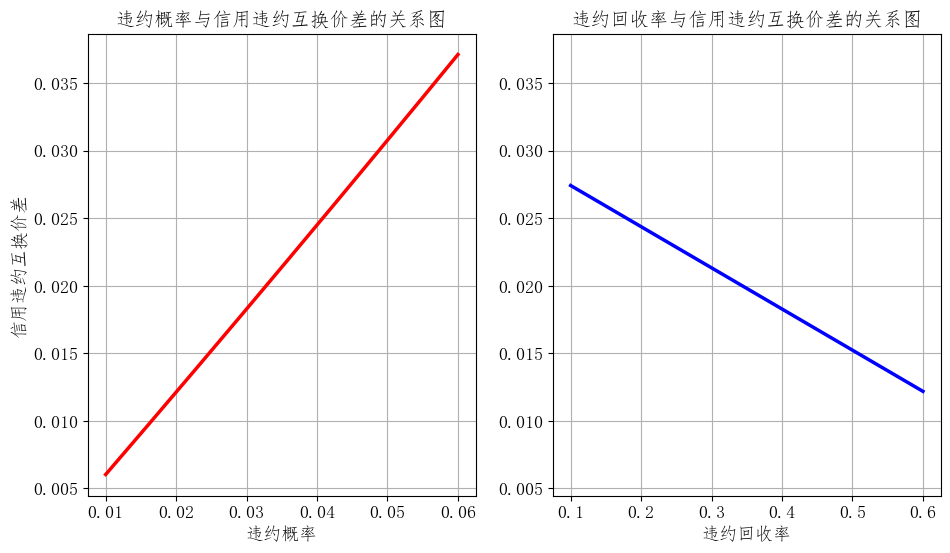

In [128]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.plot(h_list,spread_list1,'r-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel(u'违约概率',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'信用违约互换价差',fontsize=13,rotation=90)
plt.title(u'违约概率与信用违约互换价差的关系图',fontsize=14)
plt.grid()
plt.subplot(1,2,2,sharey=plt.subplot(1,2,1))
plt.plot(r_list,spread_list2,'b-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel(u'违约回收率',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'违约回收率与信用违约互换价差的关系图',fontsize=14)
plt.grid()
plt.show()